In [16]:
import numpy as np
import scipy.signal as signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/leo_dacasi/Dokumente/summerofcode/ENFify/sources')
from frequency_phase_estimation import phase_estimation_DFT0,phase_estimation_DFT1,instantaneous_freq
import soundfile as sf
from pydub import AudioSegment
from scipy.signal import hilbert

#Import time-frequency functions
from neurodsp.timefrequency import freq_by_time


In [17]:
def downsampling(s_raw, f_s, f_ds=1_000):
    if f_s % f_ds == 0:
        downsample_factor = f_s // f_ds
        s_ds = signal.decimate(s_raw, downsample_factor)
    else:
        nearest_downsample_factor = round(f_s / f_ds)
        new_sample_rate = f_s // nearest_downsample_factor
        
        if new_sample_rate == 0:
            raise ValueError("Der berechnete Downsample-Faktor ist nicht sinnvoll. Überprüfen Sie die Eingabewerte.")

        s_ds = signal.decimate(s_raw, nearest_downsample_factor,ftype='fir')
        print("Not sufficient good implemented yet")
    return s_ds

def bandpass_filter(sig,lowcut, highcut,fs, order):
    sos = signal.butter(order, [lowcut, highcut], btype='band', fs = fs, output = 'sos' )
    bandpass_sig = signal.sosfiltfilt(sos, sig)
    return bandpass_sig


def instantaneous_freq(signal, fs):
    analytic_sig = hilbert(signal)
    inst_phase  = np.unwrap(np.angle(analytic_sig))
    inst_freq = (np.diff(inst_phase)/(2.0*np.pi) * fs)
    return inst_freq

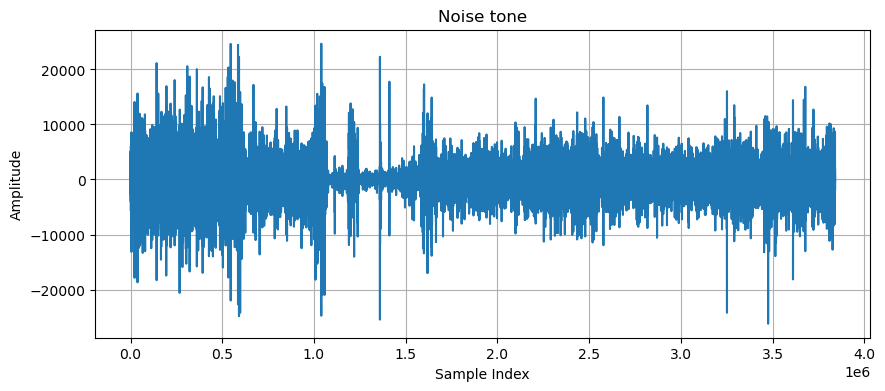

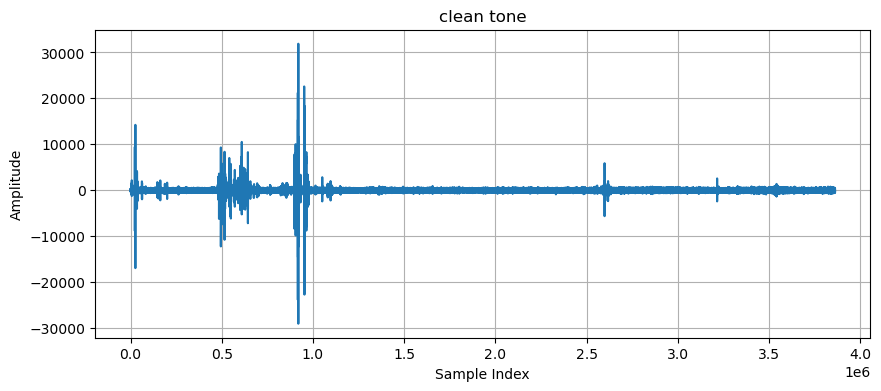

In [18]:
noise_fs, noise_data = wavfile.read('Wuhan_ENF_data/01.wav')
clean_fs, clean_data = wavfile.read('Wuhan_ENF_data/001.wav')

n_noise = np.arange(len(noise_data))
n_clean = np.arange(len(clean_data))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, noise_data)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n_clean, clean_data)
plt.title('clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

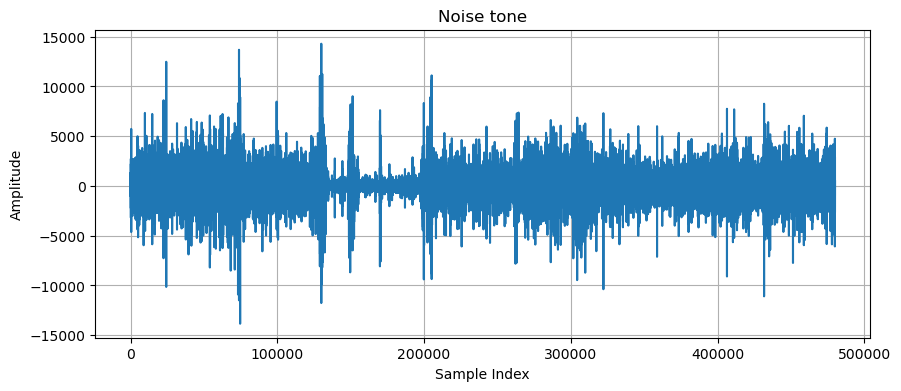

1000.0


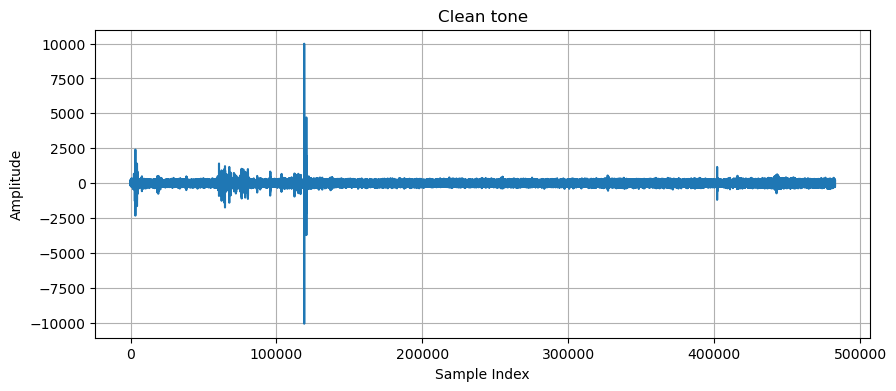

In [19]:
downsampled_noise = downsampling(noise_data, noise_fs, f_ds=1000)
downsampled_clean = downsampling(clean_data, clean_fs, f_ds=1000)

n_noise = np.arange(len(downsampled_noise))
n_clean = np.arange(len(downsampled_clean))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, downsampled_noise)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

sample_rate = len(downsampled_noise)/480
print(sample_rate)

plt.figure(figsize=(10, 4))
plt.plot(n_clean, downsampled_clean)
plt.title('Clean tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

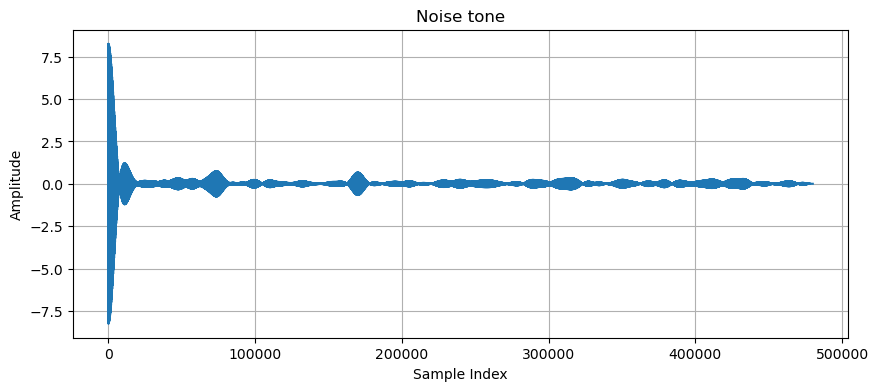

/home/leo_dacasi/miniforge3/envs/enfify/lib/python3.10/site-packages/neurodsp/filt/checks.py:172: UserWarning: Transition bandwidth is 14.8 Hz. This is greater than the desired pass/stop bandwidth of 4.0 Hz
  warn('Transition bandwidth is {:.1f} Hz. This is greater than the desired '\


[nan nan nan ... nan nan nan]


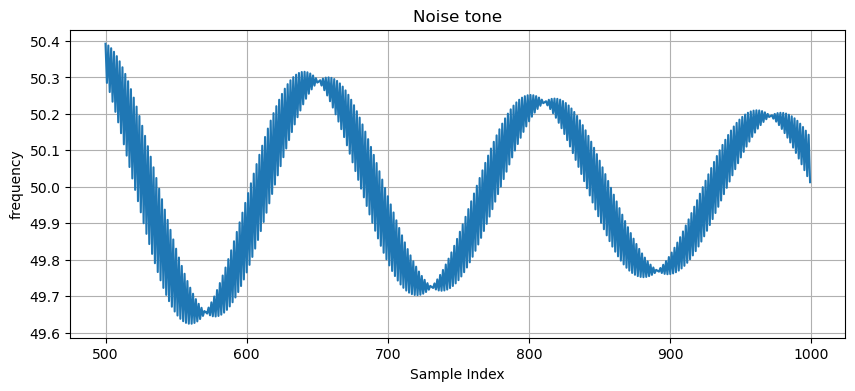

In [20]:
# Instant frequency estimation function from package SWNeurodsp
bandpass_noise = bandpass_filter(downsampled_noise, 49.5, 50.5, noise_fs, 3)
n_noise = np.arange(len(bandpass_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, bandpass_noise)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

range = (48,52)
inst_freq_noise = freq_by_time(bandpass_noise, noise_fs, range)
print(inst_freq_noise)
n_noise = np.arange(len(inst_freq_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise[500:1000], inst_freq_noise[500:1000])
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('frequency')
plt.grid()
plt.show()

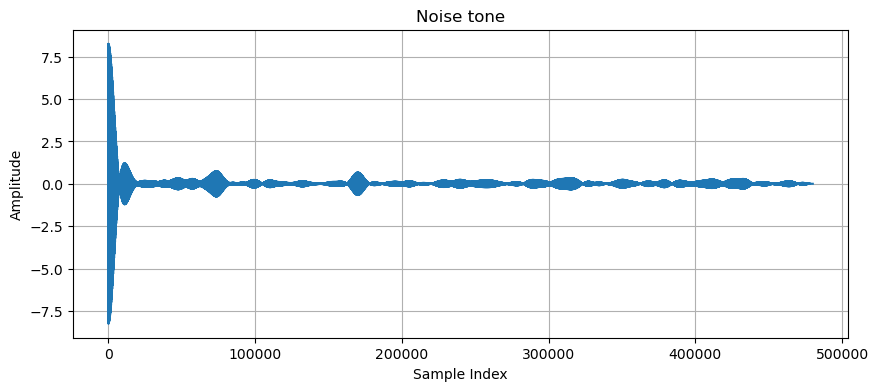

[ 9.31855682e+02  1.33507524e+02  2.76798125e+02 ...  4.72929087e-06
 -6.10963238e-06  3.99999997e+03]


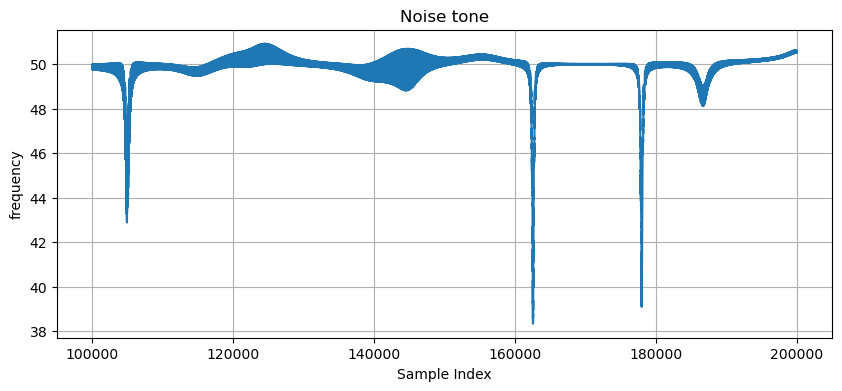

In [22]:
bandpass_noise = bandpass_filter(downsampled_noise, 49.5, 50.5, noise_fs, 3)
n_noise = np.arange(len(bandpass_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, bandpass_noise)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

inst_freq_noise = instantaneous_freq(bandpass_noise, noise_fs)

print(inst_freq_noise)
n_noise = np.arange(len(inst_freq_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise[100000:200000], inst_freq_noise[100000:200000])
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('frequency')
plt.grid()
plt.show()

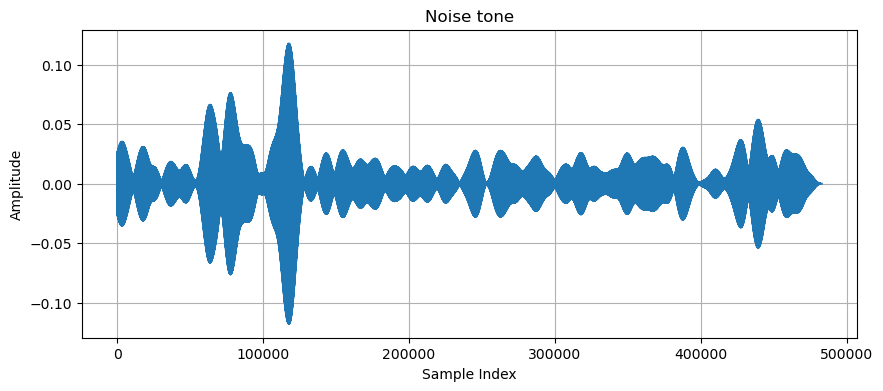

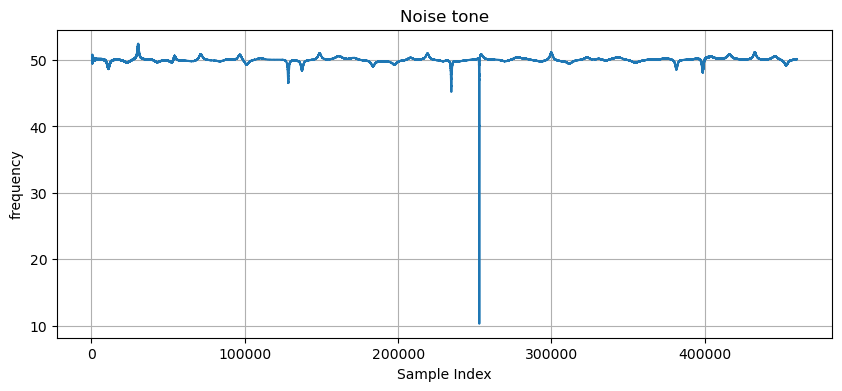

In [33]:
bandpass_clean = bandpass_filter(downsampled_clean, 49.5, 50.5, clean_fs, 3)
n_clean = np.arange(len(bandpass_clean))

plt.figure(figsize=(10, 4))
plt.plot(n_clean, bandpass_clean)
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

inst_freq_noise = instantaneous_freq(bandpass_clean, clean_fs)
n_noise = np.arange(len(inst_freq_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise[500:460000], inst_freq_noise[500:460000])
plt.title('Noise tone')
plt.xlabel('Sample Index')
plt.ylabel('frequency')
plt.grid()
plt.show()

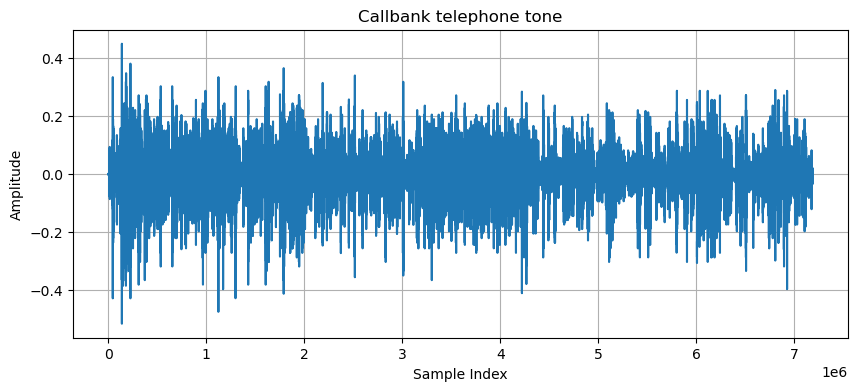

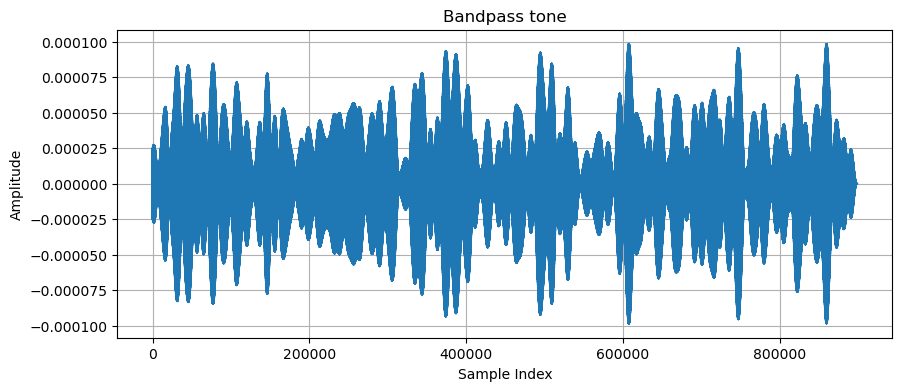

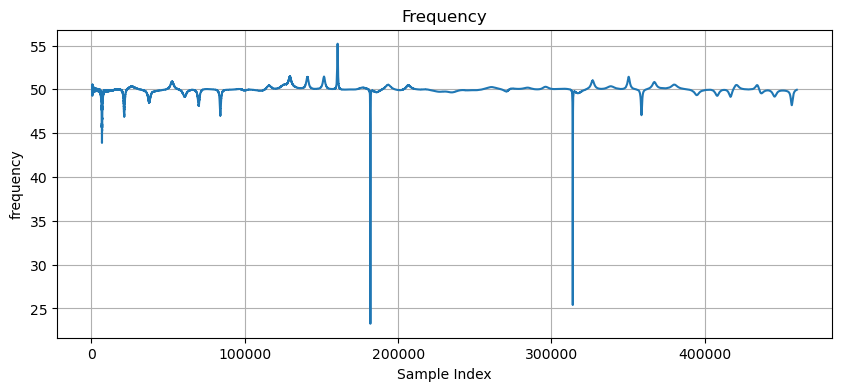

In [35]:
noise_data, noise_fs = sf.read('Talkbank_data/1082.wav')
noise_data = np.mean(noise_data, axis=1)
n_noise = np.arange(len(noise_data))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, noise_data)
plt.title('Callbank telephone tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

downsampled_noise = downsampling(noise_data, noise_fs, f_ds=1000)
bandpass_noise = bandpass_filter(downsampled_noise, 49.5, 50.5, noise_fs, 3)
n_noise = np.arange(len(bandpass_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise, bandpass_noise)
plt.title('Bandpass tone')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

inst_freq_noise = instantaneous_freq(bandpass_noise, noise_fs)
n_noise = np.arange(len(inst_freq_noise))

plt.figure(figsize=(10, 4))
plt.plot(n_noise[500:460000], inst_freq_noise[500:460000])
plt.title('Frequency')
plt.xlabel('Sample Index')
plt.ylabel('frequency')
plt.grid()
plt.show()